In [52]:
using LinearAlgebra
using Plots
using BenchmarkTools
using ProgressMeter

In [53]:
include("Operators.jl");

In [54]:
gaussian(x, a, μ, σ)=  a*exp(- (x- μ)^2/2σ^2);

In [55]:
global const ESCAPE_AXIS= 2; # for 2 day case, excluding the y-axis

In [56]:
# Research about the appropriate grid size for inhomogeneous media

# Appropriate values
zgrid= 1:100; # m
ygrid= 1:1; # m
xgrid= 1:100; # m
nz, ny, nx= length.([zgrid, ygrid, xgrid]);

In [57]:
# Change tgrid according to dx for inhomogenous media
dx= step(xgrid);
dy= step(ygrid);
dz= step(zgrid);

κ= fill(100., nx, ny, nz);
κ[25: 35, :, :].= 400.;

dt= dx^2/ maximum(κ)* 0.1;
tgrid= 0:dt:1.5;
nt= length(tgrid);

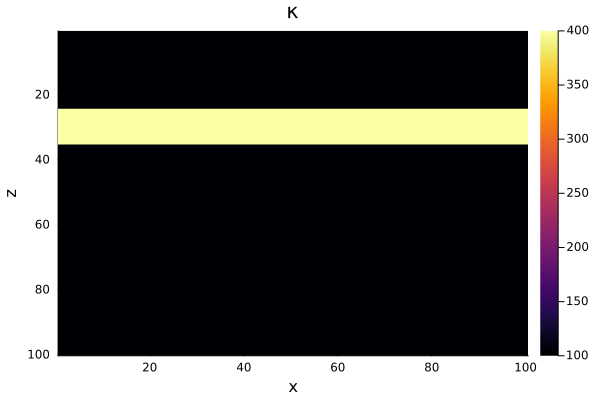

In [58]:
heatmap(xgrid, zgrid, κ[:,1,:], yflip= true, title= "κ", xlabel="x", ylabel= "z")

In [59]:
T= zeros(nx, ny, nz, nt);


d2T1= zeros(nx, ny, nz);
d2T2= zeros(nx, ny, nz);
d2T3= zeros(nx, ny, nz);

dT1= zeros(nx, ny, nz);
dT2= zeros(nx, ny, nz);
dT3= zeros(nx, ny, nz);

dκ1= zeros(nx, ny, nz);
dκ2= zeros(nx, ny, nz);
dκ3= zeros(nx, ny, nz);

# ρ= 2300; 
# c= 2800;


# κ= k/(ρ*c);

In [60]:
# T = nx ny nz nt

function update_T!(T, d2T1, d2T2, d2T3, dT1, dT2, dT3, η, dη1, dη2, dη3, nt, Δx, Δy, Δz, Δt)
    d2_x!(d2T1, T[:,:,:,nt-1], Δx)
    d2_y!(d2T2, T[:,:,:,nt-1], Δy)
    d2_z!(d2T3, T[:,:,:,nt-1], Δz)
    
    d_x!(dT1, T[:,:,:,nt-1], Δx)
    d_y!(dT2, T[:,:,:,nt-1], Δy)
    d_z!(dT3, T[:,:,:,nt-1], Δz)
    
    d_x!(dη1, η[:,:,:], Δx)
    d_y!(dη2, η[:,:,:], Δy)
    d_z!(dη3, η[:,:,:], Δz)
    
    T[:,:,:, nt].= T[:,:,:, nt-1] + Δt*η.*(d2T1 .+ d2T2 .+d2T3)+ Δt.* (dη1.*dT1.+ dη2.*dT2.+ dη3.*dT3);
end

update_T! (generic function with 1 method)

In [61]:
T[:,1,1,1]= gaussian.(1:nx, 0.1, 30, 5).+ gaussian.(1:nx, 0.1, 70, 5);

In [62]:
@showprogress for it in 2:nt
    update_T!(T, d2T1, d2T2, d2T3, dT1, dT2, dT3, κ, dκ1, dκ2, dκ3, it, dx, dy, dz, dt);
    # if it==5 break; end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:16


In [63]:
anim_heat= @animate for it in 1:20:nt
    heatmap(T[:,1,:,it], yflip= true, title= "$it", clim= (0.,0.06))
end

Animation("/var/folders/x1/3hy4wtvs4b33gn48_tg_n29w0311lh/T/jl_yFVwy5", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000292.png", "000293.png", "000294.png", "000295.png", "000296.png", "000297.png", "000298.png", "000299.png", "000300.png", "000301.png"])

┌ Info: Saved animation to /Users/asingh933/Desktop/hey/Earth Systems Modeling/Assignments/heat_diffusion.gif
└ @ Plots /Users/asingh933/.julia/packages/Plots/zzg7i/src/animation.jl:149


Plots.AnimatedGif("/Users/asingh933/Desktop/hey/Earth Systems Modeling/Assignments/heat_diffusion.gif")
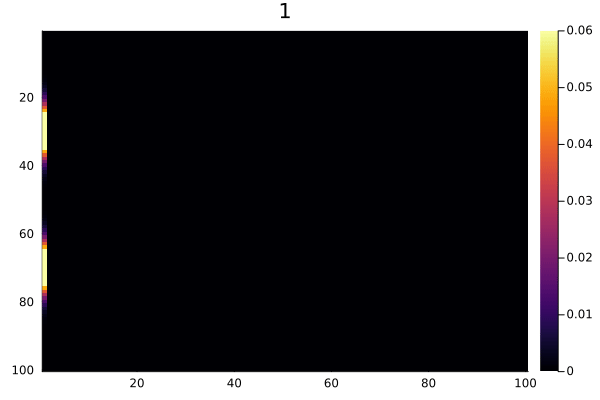

In [64]:
gif(anim_heat, "heat_diffusion.gif")